# Model #1 Simple Linear Regression (Forex Spot Price -> Forex Spot Price)


*   Import data>GBP/USD.csv
*   Taking the first 7 days as x and the 8th day as y.

# Imports


In [1]:
# Libraries
import pathlib
import numpy as np
import pandas as pd
# Graphs
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
plt.style.use('seaborn')
from matplotlib import rcParams
# Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Modeling metrics
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt



# Import Data

In [2]:
forex_dataset= pd.read_csv('GBP_USD.csv', na_values = "?", comment='\t', skipinitialspace=True)
forex_dataset = forex_dataset.copy()
forex_dataset = forex_dataset.fillna(method='ffill')
forex_dataset = forex_dataset.iloc[::-1,:] # Reverse order of dataset
forex_dataset.reset_index(drop=True, inplace=True) # Reset index
dataset = pd.DataFrame(forex_dataset,columns=['Price','Date'])
dataset.shape

(214, 2)

#### Plotting

In [3]:
date = dataset['Date']
dateFormatting = pd.DataFrame({'new_date': pd.date_range('2019-12-31', '2020-07-31', periods=len(date))})
my_xticks = dateFormatting['new_date'].tolist()


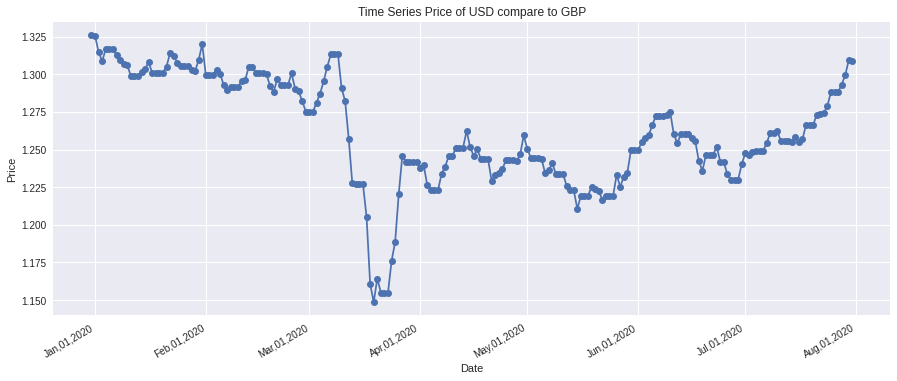

In [4]:
rcParams['figure.figsize'] = 15,6
dates = np.array(dateFormatting['new_date'])
price = np.array(dataset['Price'])
plt.plot_date(dates,price, linestyle ='solid')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b,%d,%Y')
plt.title('Time Series Price of USD compare to GBP')
plt.xlabel('Date')
plt.ylabel('Price')
plt.gca().xaxis.set_major_formatter(date_format)

# Split train & test set


In [5]:
# Look back leading up to the 7 days before the day we care about
look_back=7
num_samples=len(dataset)-look_back
print('Number of samples: ', num_samples)
# Get indices for new dataset
indices=np.arange(num_samples).astype(np.int)[:,None]+np.arange(look_back+1).astype(np.int)
# Create the 2D matrix of training samples
data = dataset["Price"].values[indices] 
# Each row represents 7 days in the past
x = data[:,:-1] 
# Each output value represents the 8th day
y = data[:,-1] 

Number of samples:  207


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0, shuffle = False)

In [7]:
x_train.shape, x_test.shape

((165, 7), (42, 7))

In [8]:
x_test.shape, y_test.shape

((42, 7), (42,))

# Modelling

In [9]:
def get_best_fit_train (pred):
  rcParams['figure.figsize'] = 15,6
  plt.plot(y_train, label = 'y_train')
  plt.plot(pred, label = 'y_pred',color = "red", linewidth=2)
  plt.xlabel('Spot Price Days Input')
  plt.ylabel('Spot Price Output')
  plt.legend()

def get_best_fit_test (pred):
  rcParams['figure.figsize'] = 15,6
  plt.plot(y_test, label = 'y_test')
  plt.plot(pred, label = 'y_pred',color = "red", linewidth=2)
  plt.xlabel('Spot Price Days Input')
  plt.ylabel('Spot Price Output')
  plt.legend()

# Simple Linear Regression

In [10]:
# Assigning the linear regression model
model_lr=LinearRegression()
model_lr.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
pred_train_lr= model_lr.predict(x_train)
pred_test_lr= model_lr.predict(x_test)


Text(0.5, 1.0, 'Where Linear Regression Model Train Results Fall on Actual Spot Price')

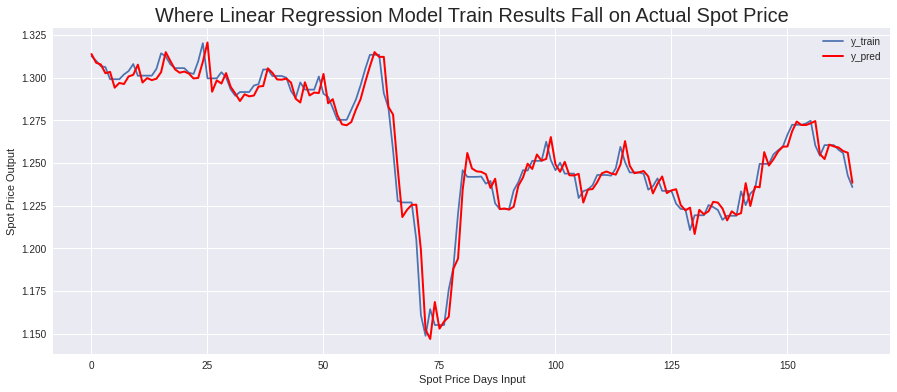

In [12]:
get_best_fit_train(pred_train_lr)
plt.title('Where Linear Regression Model Train Results Fall on Actual Spot Price', size = 20)


Text(0.5, 1.0, 'Where Linear Regression Model Test Results Fall on Actual Spot Price')

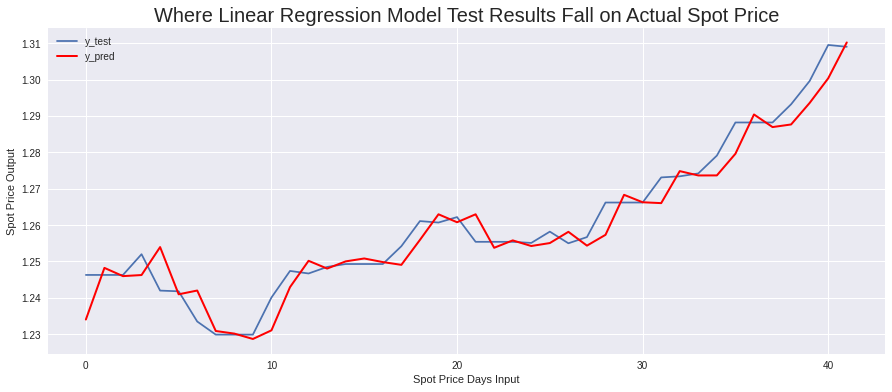

In [13]:
get_best_fit_test(pred_test_lr)
plt.title('Where Linear Regression Model Test Results Fall on Actual Spot Price', size = 20)

# Comparison Actual Versus Predicted

### Performance Metrics

In [14]:
def get_performance_train (model_pred):
  print('Mean Absolute Error:', mean_absolute_error(y_train, model_pred).round(4))  
  print('Mean Squared Error:', mean_squared_error(y_train, model_pred).round(4))
  print('R2_Score:',r2_score(y_train, model_pred).round(4)) 

def get_performance_test (model_pred):
  print('Mean Absolute Error:', mean_absolute_error(y_test, model_pred).round(4))  
  print('Mean Squared Error:', mean_squared_error(y_test, model_pred).round(4))  
  print('R2_Score:',r2_score(y_test, model_pred).round(4)) 


In [15]:
print('Train:')
get_performance_train(pred_train_lr)
print('\nTest:')
get_performance_test(pred_test_lr)

Train:
Mean Absolute Error: 0.0054
Mean Squared Error: 0.0001
R2_Score: 0.9565

Test:
Mean Absolute Error: 0.0037
Mean Squared Error: 0.0
R2_Score: 0.9373


### Visual Representation

#### Train Actual Versus Predicted

In [16]:
comparison_train = pd.DataFrame({'Actual': y_train, 'Predicted': pred_train_lr})
comparison_train = comparison_train.head(7)
comparison_train.sort_index(inplace=True)
comparison_train

,Actual,Predicted
0,1.3125,1.313751
1,1.3098,1.308661
2,1.3067,1.307644
3,1.3061,1.302511
4,1.2990,1.303299
5,1.2990,1.294039
6,1.2990,1.296808


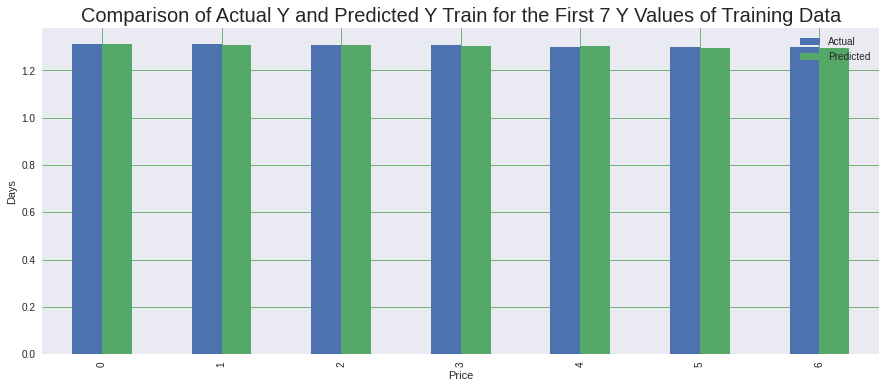

In [17]:
rcParams['figure.figsize'] = 15,6
comparison_train.plot(kind='bar')
plt.title('Comparison of Actual Y and Predicted Y Train for the First 7 Y Values of Training Data', size=20)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Price')
plt.ylabel('Days')
plt.show()

#### Test Actual Versus Predicted

In [18]:
comparison_test = pd.DataFrame({'Actual': y_test, 'Predicted': pred_test_lr})
comparison_test = comparison_test.tail(7)
comparison_test.sort_index(inplace=True)
comparison_test

,Actual,Predicted
35,1.2882,1.279606
36,1.2882,1.290401
37,1.2882,1.286934
38,1.2932,1.287654
39,1.2996,1.293574
40,1.3095,1.300342
41,1.3090,1.310188


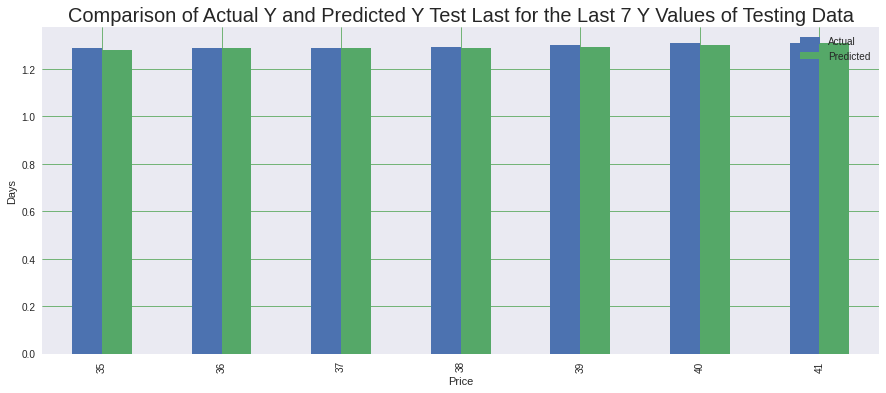

In [19]:
rcParams['figure.figsize'] = 15,6
comparison_test.plot(kind='bar')
plt.title('Comparison of Actual Y and Predicted Y Test Last for the Last 7 Y Values of Testing Data', size=20)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Price')
plt.ylabel('Days')
plt.show()

# Simple Linear Regression Formula

In [20]:
slope = model_lr.coef_[6]
intercept = model_lr.intercept_
print("formula: y = {0} + {1}x".format(intercept,slope))

formula: y = 0.054265169095071064 + 1.2671184009067529x
